In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
from matplotlib.ticker import PercentFormatter
py.init_notebook_mode(connected=True) # this allows to display plotly graphs in Jupyter
pd.options.display.max_columns = None

In [2]:
df = pd.read_excel("./mkt_data_cleaned.xlsx", header = 0, index_col = False)
df2 = pd.read_excel("./products.xlsx", header = 0, index_col = False)

In [3]:
df

,City,Users,Bounce Rate,% New Sessions,Sessions,Avg. Session Duration,Avg. Time on Page,Hits,Pageviews,Number of Sessions per User,Exits,Avg. Price,Avg. QTY,Purchase Completed (Goal 1 Completions),Product Revenue,Revenue per User,Revenue,Transactions,Transactions per User,Unique Purchases
0,Paris,6965,0.5903,0.7191,9187,193.39,101.35,31226,26717,1.32,9187,21.78,1.0,3,65.34,0.01,65.34,3,0.00,3
1,Dublin,5776,0.5500,0.7136,7805,136.33,57.22,31553,26401,1.35,7805,26.00,1.0,23,1949.74,0.34,1949.74,33,0.01,75
2,Madrid,4953,0.5715,0.7000,6609,174.39,100.56,20151,18070,1.33,6609,0.00,0.0,0,0.00,0.00,0.00,0,0.00,0
3,Barcelona,3603,0.5613,0.7075,4848,221.52,96.31,18994,15998,1.35,4848,48.07,1.0,3,769.18,0.21,769.18,3,0.00,16
4,Warsaw,3012,0.5531,0.7979,3656,124.19,50.11,15848,12715,1.21,3656,17.09,1.0,3,222.16,0.07,222.16,3,0.00,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Aubervilliers,26,0.6667,0.6667,39,41.64,16.08,186,140,1.50,39,0.00,0.0,0,0.00,0.00,0.00,0,0.00,0
996,Bagneux,26,0.7931,0.7931,29,21.17,9.90,150,91,1.12,29,0.00,0.0,0,0.00,0.00,0.00,0,0.00,0
997,Bobigny,26,0.6897,0.8966,29,30.86,20.88,95,72,1.12,29,0.00,0.0,0,0.00,0.00,0.00,0,0.00,0
998,Neuilly-sur-Seine,26,0.6154,1.0000,26,63.08,11.00,284,176,1.00,26,0.00,0.0,0,0.00,0.00,0.00,0,0.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   City                                     1000 non-null   object 
 1   Users                                    1000 non-null   int64  
 2   Bounce Rate                              1000 non-null   float64
 3   % New Sessions                           1000 non-null   float64
 4   Sessions                                 1000 non-null   int64  
 5   Avg. Session Duration                    1000 non-null   float64
 6   Avg. Time on Page                        1000 non-null   float64
 7   Hits                                     1000 non-null   int64  
 8   Pageviews                                1000 non-null   int64  
 9   Number of Sessions per User              1000 non-null   float64
 10  Exits                                    1000 non

In [5]:
df.describe()

,Users,Bounce Rate,% New Sessions,Sessions,Avg. Session Duration,Avg. Time on Page,Hits,Pageviews,Number of Sessions per User,Exits,Avg. Price,Avg. QTY,Purchase Completed (Goal 1 Completions),Product Revenue,Revenue per User,Revenue,Transactions,Transactions per User,Unique Purchases
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,158.474000,0.568647,0.791730,200.519000,142.322250,75.427380,730.796000,624.390000,1.232980,200.496000,0.645800,0.078380,0.125000,14.752780,0.085020,14.752780,0.136000,0.000550,0.58300
std,448.275014,0.130460,0.130380,587.798272,110.309569,52.222611,2212.684479,1873.858474,0.221288,587.763086,5.092933,1.083844,0.950936,121.734198,1.069164,121.734198,1.238967,0.005369,5.29331
min,26.000000,0.090900,0.312900,26.000000,0.000000,0.000000,29.000000,29.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,36.000000,0.484800,0.709525,42.000000,65.095000,39.935000,127.000000,113.250000,1.090000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,56.000000,0.569200,0.805600,69.000000,121.500000,63.170000,238.000000,209.000000,1.180000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,108.750000,0.652600,0.883250,137.000000,184.367500,95.690000,481.000000,418.000000,1.322500,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,6965.000000,1.000000,1.000000,9187.000000,932.920000,414.220000,31553.000000,26717.000000,3.000000,9187.000000,104.540000,32.670000,23.000000,1949.740000,21.430000,1949.740000,33.000000,0.080000,88.00000


In [6]:
df.tail(10)

,City,Users,Bounce Rate,% New Sessions,Sessions,Avg. Session Duration,Avg. Time on Page,Hits,Pageviews,Number of Sessions per User,Exits,Avg. Price,Avg. QTY,Purchase Completed (Goal 1 Completions),Product Revenue,Revenue per User,Revenue,Transactions,Transactions per User,Unique Purchases
990,Viborg,26,0.5000,1.0000,26,55.54,25.79,114,82,1.00,26,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
991,Ceuta,26,0.3095,0.6190,42,619.40,45.69,693,611,1.62,42,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
992,Coslada,26,0.3611,0.6389,36,347.75,101.02,193,160,1.38,36,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
993,Hamina,26,0.3333,0.6667,39,156.38,58.00,186,144,1.50,39,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
994,Lahti,26,0.8846,1.0000,26,1.77,15.33,29,29,1.00,26,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
995,Aubervilliers,26,0.6667,0.6667,39,41.64,16.08,186,140,1.50,39,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
996,Bagneux,26,0.7931,0.7931,29,21.17,9.90,150,91,1.12,29,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
997,Bobigny,26,0.6897,0.8966,29,30.86,20.88,95,72,1.12,29,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
998,Neuilly-sur-Seine,26,0.6154,1.0000,26,63.08,11.00,284,176,1.00,26,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
999,Palaiseau,26,0.4483,0.8966,29,165.59,31.74,199,180,1.12,29,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0


In [20]:
fig1 = px.histogram(df, x = df.City, y = df.Users)
fig1.show()

In [19]:
fig2 = px.box(df, y = df.Users, points = "all")
fig2.show()

In [9]:
## aqui vemos que eliminando a Paris podemos obtener una ciudad con una mejor renta. 
df_top = df.iloc[1:11]
fig_top = px.histogram(df_top, x = df_top.City, y = df_top.Users)
fig_top.show()

In [10]:
fig_rev = px.histogram(df_top, x = df_top.City, y = df_top.Revenue, height = 350)
fig_rev.update_xaxes(categoryorder = "total descending")
fig_rev.show()

In [11]:
df_top

,City,Users,Bounce Rate,% New Sessions,Sessions,Avg. Session Duration,Avg. Time on Page,Hits,Pageviews,Number of Sessions per User,Exits,Avg. Price,Avg. QTY,Purchase Completed (Goal 1 Completions),Product Revenue,Revenue per User,Revenue,Transactions,Transactions per User,Unique Purchases
1,Dublin,5776,0.5500,0.7136,7805,136.33,57.22,31553,26401,1.35,7805,26.00,1.00,23,1949.74,0.34,1949.74,33,0.01,75
2,Madrid,4953,0.5715,0.7000,6609,174.39,100.56,20151,18070,1.33,6609,0.00,0.00,0,0.00,0.00,0.00,0,0.00,0
3,Barcelona,3603,0.5613,0.7075,4848,221.52,96.31,18994,15998,1.35,4848,48.07,1.00,3,769.18,0.21,769.18,3,0.00,16
4,Warsaw,3012,0.5531,0.7979,3656,124.19,50.11,15848,12715,1.21,3656,17.09,1.00,3,222.16,0.07,222.16,3,0.00,13
5,Moscow,2725,0.5766,0.7070,3734,206.95,92.09,15002,12124,1.37,3734,0.00,0.00,0,0.00,0.00,0.00,0,0.00,0
6,Zurich,2679,0.5191,0.7907,3215,137.84,52.84,13705,11601,1.20,3215,48.35,1.00,7,628.57,0.23,628.57,7,0.00,13
7,Amsterdam,2633,0.5722,0.6911,3574,182.59,76.09,14764,12150,1.36,3574,17.39,2.77,7,1251.91,0.48,1251.91,7,0.00,26
8,Milan,2587,0.6148,0.7984,3061,141.32,76.49,10020,8716,1.18,3061,24.50,3.33,3,245.02,0.09,245.02,3,0.00,3
9,Berlin,2454,0.5717,0.7674,3091,124.38,57.90,11405,9732,1.26,3091,32.02,1.00,7,512.26,0.21,512.26,10,0.00,16
10,Edinburgh,2231,0.4962,0.8225,2614,124.88,57.83,9216,8259,1.17,2614,0.00,0.00,0,0.00,0.00,0.00,0,0.00,0


In [12]:
fig_sessions = px.histogram(df_top, x = df_top.City, y = df_top.Sessions, height = 350)
fig_sessions.update_xaxes(categoryorder = "total descending")
fig_sessions.show()

In [13]:
## I'm dropping: Transactions per User, Hits, Bounce Rate and Exits since these don't give us additional value to the analysis. 
## After getting a final data set I will add information in case it's needed. 

df_top_2 = df_top.drop(["Transactions per User", "Hits", "Exits", "Bounce Rate" , "% New Sessions", "Product Revenue"], axis = 1)

In [14]:
df_top_2

,City,Users,Sessions,Avg. Session Duration,Avg. Time on Page,Pageviews,Number of Sessions per User,Avg. Price,Avg. QTY,Purchase Completed (Goal 1 Completions),Revenue per User,Revenue,Transactions,Unique Purchases
1,Dublin,5776,7805,136.33,57.22,26401,1.35,26.00,1.00,23,0.34,1949.74,33,75
2,Madrid,4953,6609,174.39,100.56,18070,1.33,0.00,0.00,0,0.00,0.00,0,0
3,Barcelona,3603,4848,221.52,96.31,15998,1.35,48.07,1.00,3,0.21,769.18,3,16
4,Warsaw,3012,3656,124.19,50.11,12715,1.21,17.09,1.00,3,0.07,222.16,3,13
5,Moscow,2725,3734,206.95,92.09,12124,1.37,0.00,0.00,0,0.00,0.00,0,0
6,Zurich,2679,3215,137.84,52.84,11601,1.20,48.35,1.00,7,0.23,628.57,7,13
7,Amsterdam,2633,3574,182.59,76.09,12150,1.36,17.39,2.77,7,0.48,1251.91,7,26
8,Milan,2587,3061,141.32,76.49,8716,1.18,24.50,3.33,3,0.09,245.02,3,3
9,Berlin,2454,3091,124.38,57.90,9732,1.26,32.02,1.00,7,0.21,512.26,10,16
10,Edinburgh,2231,2614,124.88,57.83,8259,1.17,0.00,0.00,0,0.00,0.00,0,0


#### After finishing data cleaning and getting a more compact dataset, we can see that Dublin is the best option so far

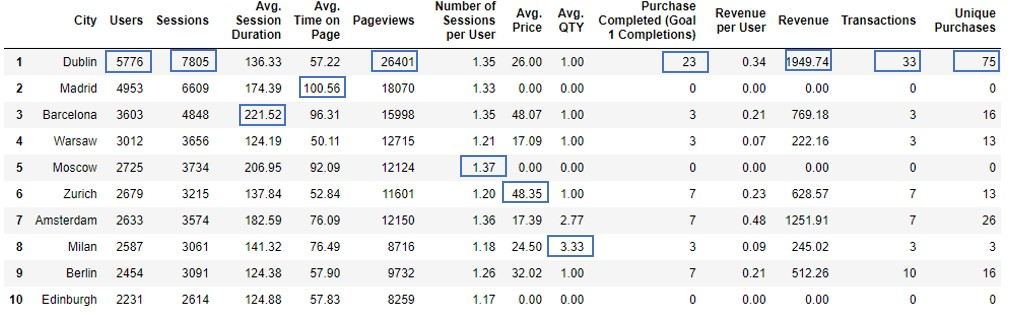

In [15]:
df_decision = df_top_2.iloc[[0,6]]
df_decision

,City,Users,Sessions,Avg. Session Duration,Avg. Time on Page,Pageviews,Number of Sessions per User,Avg. Price,Avg. QTY,Purchase Completed (Goal 1 Completions),Revenue per User,Revenue,Transactions,Unique Purchases
1,Dublin,5776,7805,136.33,57.22,26401,1.35,26.00,1.00,23,0.34,1949.74,33,75
7,Amsterdam,2633,3574,182.59,76.09,12150,1.36,17.39,2.77,7,0.48,1251.91,7,26


### As an additional input, we use the Global Power City index that explains in 6 dimensions how attractive a city is nowadays

### Because we are taking the economical aspect as key feature, we confirm that Dublin has a better rank than Amsterdam. 

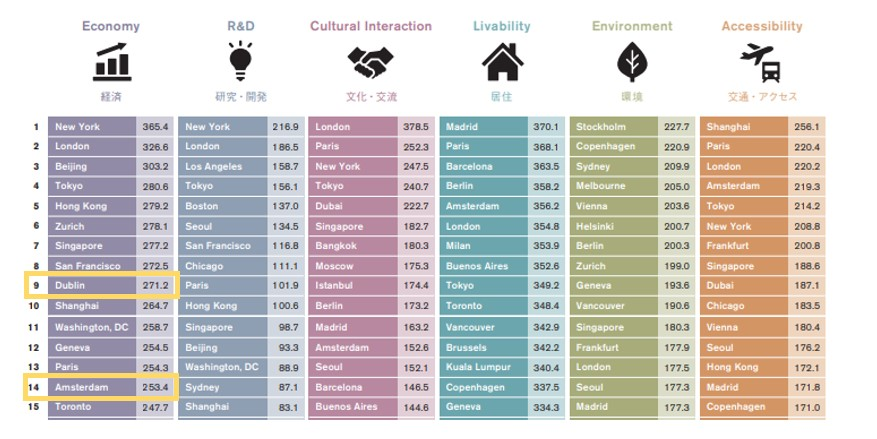


this is the link to the report:https://www.mori-m-foundation.or.jp/pdf/GPCI2021_summary.pdf

### Age is relevant also in terms of demographics but in this case, I've decided not to use it becuase the distribution is the same for both cities.

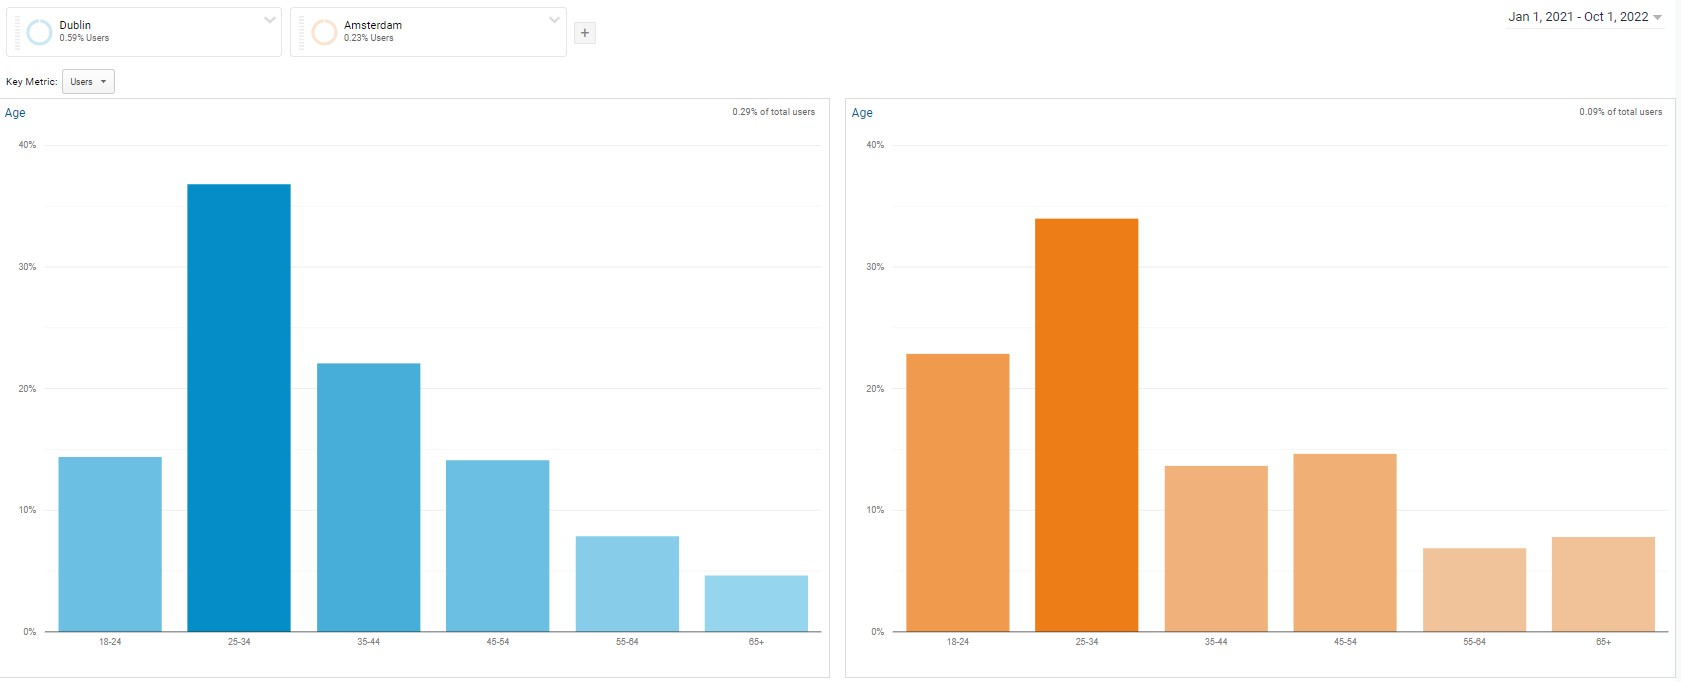

## We now that our store is going to be located in Dublin but... what are we selling? 

### For this question, we take a look to our products dataset extracted from  our google analytics platform

In [16]:
df2

,Product,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate
0,Google Camp Fleece Snap Pullover,961.803157,13,13,73.984858,1.000000,0,0,0.000000
1,Google Land & Sea Nalgene Water Bottle,490.049163,3,20,24.502458,6.666667,0,0,0.428571
2,Google Knit Blanket,459.992814,3,7,65.713259,2.333333,0,0,0.300000
3,YouTube Black Zip Hoodie,360.676184,7,7,51.525169,1.000000,0,0,0.000000
4,Google Women's Eco Tee Black,297.949891,10,16,18.621868,1.600000,0,0,3.333333
5,Google Ultralight Gray Sweatshirt,261.359553,7,7,37.337079,1.000000,0,0,0.000000
6,Google Women's Essential Jacket,256.132362,3,3,85.377454,1.000000,0,0,0.000000
7,Google F/C Longsleeve Ash,235.223598,10,10,23.522360,1.000000,0,0,0.000000
8,Google Charcoal Unisex Badge Tee,233.263401,10,13,17.943339,1.300000,0,0,1.428571
9,Google Ladies Expedition Half Zip,229.996407,3,3,76.665469,1.000000,0,0,0.000000


In [17]:
## first of all, we are going to drop some columns that have no information

df2_light = df2.drop(["Product Refund Amount", "Cart-to-Detail Rate", "Buy-to-Detail Rate"], axis = 1)
df2_light = df2.drop([50], axis = 0)
df2_light

,Product,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate
0,Google Camp Fleece Snap Pullover,961.803157,13,13,73.984858,1.000000,0,0,0.000000
1,Google Land & Sea Nalgene Water Bottle,490.049163,3,20,24.502458,6.666667,0,0,0.428571
2,Google Knit Blanket,459.992814,3,7,65.713259,2.333333,0,0,0.300000
3,YouTube Black Zip Hoodie,360.676184,7,7,51.525169,1.000000,0,0,0.000000
4,Google Women's Eco Tee Black,297.949891,10,16,18.621868,1.600000,0,0,3.333333
5,Google Ultralight Gray Sweatshirt,261.359553,7,7,37.337079,1.000000,0,0,0.000000
6,Google Women's Essential Jacket,256.132362,3,3,85.377454,1.000000,0,0,0.000000
7,Google F/C Longsleeve Ash,235.223598,10,10,23.522360,1.000000,0,0,0.000000
8,Google Charcoal Unisex Badge Tee,233.263401,10,13,17.943339,1.300000,0,0,1.428571
9,Google Ladies Expedition Half Zip,229.996407,3,3,76.665469,1.000000,0,0,0.000000


In [18]:
## Now we plot our values to see how many of our products are really making a difference
fig_products_rev = px.histogram(df2_light, x = df2_light["Product"], y = df2_light["Product Revenue"])
fig_products_rev.show()
fig_products_quant = px.histogram(df2_light, x = df2_light["Product"], y = df2_light["Quantity"])
fig_products_quant.show()